# NETWORK INTRUSION DETECTION

In [ ]:
train = pd.read_table('KDDTrain+.txt',sep=',',header=None)
test = pd.read_table('KDDTest+.txt',sep=',',header=None)

feature_names = ['Duration', 'Protocol Type', 'Service', 'Flag', 'Source Bytes', 'Destination Bytes', 'Land', 'Wrong Fragment',
                 'Urgent', 'Hot', 'Number Failed Logins', 'Login', 'Num compromised', 'Root Shell', 'Su attempted', 'Num root', 'Num file creations',
                'Num shells', 'Num access files', 'Num outbound cmds', 'Is host login', 'Is guest Login', 'Count', 'Srv Count', 'Serror rate',  'Srv Serror rate',
                'Rerror rate', 'Srv rerror rate', 'Same srv rate', 'Diff srv rate', 'Srv diff host rate', 'Dst host count', 'Dst host srv count', 'Dst host same srv rate',
                'Dst host diff srv rate', 'Dst host same src port rate', 'Dst host diff src host rate', 'Dst host serror rate', 'Dst host srv serror rate',
                'Dst host rerror rate', 'Dst host srv rerror rate', 'Class Label', 'Difficulty']

train.columns = feature_names
test.columns = feature_names

In [ ]:
train.shape

(125973, 43)

In [ ]:
test.shape

(22544, 43)

In [ ]:
train.head()

,Duration,Protocol Type,Service,Flag,Source Bytes,Destination Bytes,Land,Wrong Fragment,Urgent,Hot,...,Dst host same srv rate,Dst host diff srv rate,Dst host same src port rate,Dst host diff src host rate,Dst host serror rate,Dst host srv serror rate,Dst host rerror rate,Dst host srv rerror rate,Class Label,Difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
test.head()

,Duration,Protocol Type,Service,Flag,Source Bytes,Destination Bytes,Land,Wrong Fragment,Urgent,Hot,...,Dst host same srv rate,Dst host diff srv rate,Dst host same src port rate,Dst host diff src host rate,Dst host serror rate,Dst host srv serror rate,Dst host rerror rate,Dst host srv rerror rate,Class Label,Difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
train_target = train['Class Label']
train_target_labels = train_target.unique().tolist()
train_attacks = train_target_labels.remove('normal')
train['Class Label'] = train['Class Label'].replace([i for i in train_target_labels],'attack')

In [ ]:
test_target = test['Class Label']
test_target_labels = test_target.unique().tolist()
test_attacks = test_target_labels.remove('normal')
test['Class Label'] = test['Class Label'].replace([i for i in test_target_labels],'attack')

In [ ]:
test['Class Label'].value_counts()

attack    12833
normal     9711
Name: Class Label, dtype: int64

In [ ]:
train.describe()

,Duration,Source Bytes,Destination Bytes,Land,Wrong Fragment,Urgent,Hot,Number Failed Logins,Login,Num compromised,...,Dst host srv count,Dst host same srv rate,Dst host diff srv rate,Dst host same src port rate,Dst host diff src host rate,Dst host serror rate,Dst host srv serror rate,Dst host rerror rate,Dst host srv rerror rate,Difficulty
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Duration                     125973 non-null  int64  
 1   Protocol Type                125973 non-null  object 
 2   Service                      125973 non-null  object 
 3   Flag                         125973 non-null  object 
 4   Source Bytes                 125973 non-null  int64  
 5   Destination Bytes            125973 non-null  int64  
 6   Land                         125973 non-null  int64  
 7   Wrong Fragment               125973 non-null  int64  
 8   Urgent                       125973 non-null  int64  
 9   Hot                          125973 non-null  int64  
 10  Number Failed Logins         125973 non-null  int64  
 11  Login                        125973 non-null  int64  
 12  Num compromised              125973 non-null  int64  
 13 

In [ ]:
categorical_features = [feature for feature in train if train[feature].dtype == 'object']
numerical_features = [feature for feature in train if train[feature].dtype != 'object']

In [ ]:
categorical_features

['Protocol Type', 'Service', 'Flag', 'Class Label']

In [ ]:
numerical_features

['Duration',
 'Source Bytes',
 'Destination Bytes',
 'Land',
 'Wrong Fragment',
 'Urgent',
 'Hot',
 'Number Failed Logins',
 'Login',
 'Num compromised',
 'Root Shell',
 'Su attempted',
 'Num root',
 'Num file creations',
 'Num shells',
 'Num access files',
 'Num outbound cmds',
 'Is host login',
 'Is guest Login',
 'Count',
 'Srv Count',
 'Serror rate',
 'Srv Serror rate',
 'Rerror rate',
 'Srv rerror rate',
 'Same srv rate',
 'Diff srv rate',
 'Srv diff host rate',
 'Dst host count',
 'Dst host srv count',
 'Dst host same srv rate',
 'Dst host diff srv rate',
 'Dst host same src port rate',
 'Dst host diff src host rate',
 'Dst host serror rate',
 'Dst host srv serror rate',
 'Dst host rerror rate',
 'Dst host srv rerror rate',
 'Difficulty']

## Exploration

### Comparison Between Normal And Attack Entries

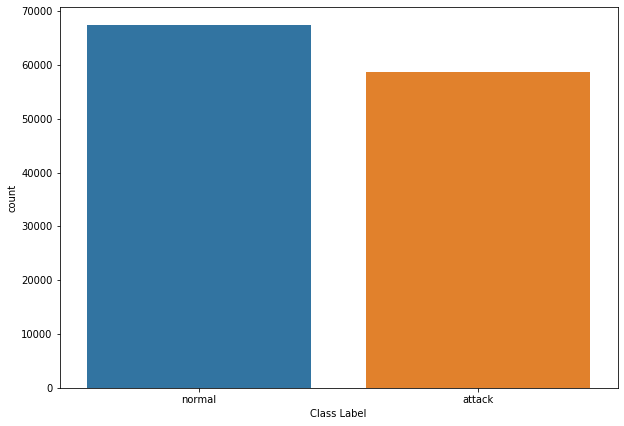

In [ ]:
fig,ax = plt.subplots(figsize=(10,7))
sns.countplot(data = train, x='Class Label')

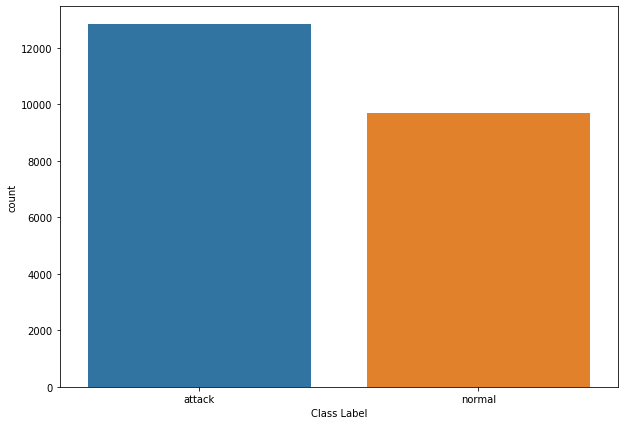

In [ ]:
fig,ax = plt.subplots(figsize=(10,7))
sns.countplot(data = test, x='Class Label' )

### Drilling Down Protocol And Service Attack Sources

In [ ]:
attack_data = train[train['Class Label'] == 'attack']
normal_data = train[train['Class Label'] == 'normal']

In [ ]:
attack_data.head()

,Duration,Protocol Type,Service,Flag,Source Bytes,Destination Bytes,Land,Wrong Fragment,Urgent,Hot,...,Dst host same srv rate,Dst host diff srv rate,Dst host same src port rate,Dst host diff src host rate,Dst host serror rate,Dst host srv serror rate,Dst host rerror rate,Dst host srv rerror rate,Class Label,Difficulty
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.0,0.0,1.0,1.0,0.0,0.0,attack,19
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.0,0.0,0.0,0.0,1.0,1.0,attack,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.0,0.0,1.0,1.0,0.0,0.0,attack,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.0,0.0,1.0,1.0,0.0,0.0,attack,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.0,0.0,1.0,1.0,0.0,0.0,attack,21


In [ ]:
attack_data['Protocol Type'].value_counts()

tcp     49089
icmp     6982
udp      2559
Name: Protocol Type, dtype: int64

In [ ]:
attack_data.pivot_table(index='Protocol Type',aggfunc = {'Source Bytes': sum,'Destination Bytes':sum})

,Destination Bytes,Source Bytes
Protocol Type,,
icmp,0,2733175
tcp,2200057970,4852937461
udp,2419,74250


In [ ]:
normal_data.pivot_table(index='Protocol Type',aggfunc = {'Source Bytes': sum,'Destination Bytes':sum})

,Destination Bytes,Source Bytes
Protocol Type,,
icmp,0,107139
tcp,290514455,883346260
udp,1059537,981031


In [ ]:
attack_tcp = attack_data[attack_data['Protocol Type'] == 'tcp']
normal_tcp = normal_data[normal_data['Protocol Type'] == 'tcp']

In [ ]:
attacks_services = pd.DataFrame(attack_tcp['Service'].value_counts())
normal_services = pd.DataFrame(normal_tcp['Service'].value_counts())

In [ ]:
attacks_services[attacks_services>500].dropna()

,Service
private,18558.0
http,2289.0
ftp_data,1876.0
other,1518.0
telnet,1436.0
finger,1222.0
Z39_50,862.0
ftp,836.0
uucp,780.0
courier,734.0


In [ ]:
normal_services[normal_services>500].dropna()

,Service
http,38049.0
smtp,7029.0
ftp_data,4984.0
ftp,918.0
telnet,917.0
finger,545.0


In [ ]:
train.pivot_table(index='Class Label', columns = 'Protocol Type', aggfunc={'Source Bytes':sum,'Destination Bytes':sum})

Destination Bytes                      Source Bytes              \
Protocol Type              icmp         tcp      udp         icmp         tcp   
Class Label                                                                     
attack                        0  2200057970     2419      2733175  4852937461   
normal                        0   290514455  1059537       107139   883346260   

                       
Protocol Type     udp  
Class Label            
attack          74250  
normal         981031

Drilling down tcp as the major source of attacks it is observed that private services on tcp protocol are the major sources of attacks

tcp protocol shows to be the major source for attacks

In [ ]:
attack_data.head()

,Duration,Protocol Type,Service,Flag,Source Bytes,Destination Bytes,Land,Wrong Fragment,Urgent,Hot,...,Dst host same srv rate,Dst host diff srv rate,Dst host same src port rate,Dst host diff src host rate,Dst host serror rate,Dst host srv serror rate,Dst host rerror rate,Dst host srv rerror rate,Class Label,Difficulty
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.0,0.0,1.0,1.0,0.0,0.0,attack,19
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.0,0.0,0.0,0.0,1.0,1.0,attack,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.0,0.0,1.0,1.0,0.0,0.0,attack,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.0,0.0,1.0,1.0,0.0,0.0,attack,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.0,0.0,1.0,1.0,0.0,0.0,attack,21


### Flag Relationship With Labels

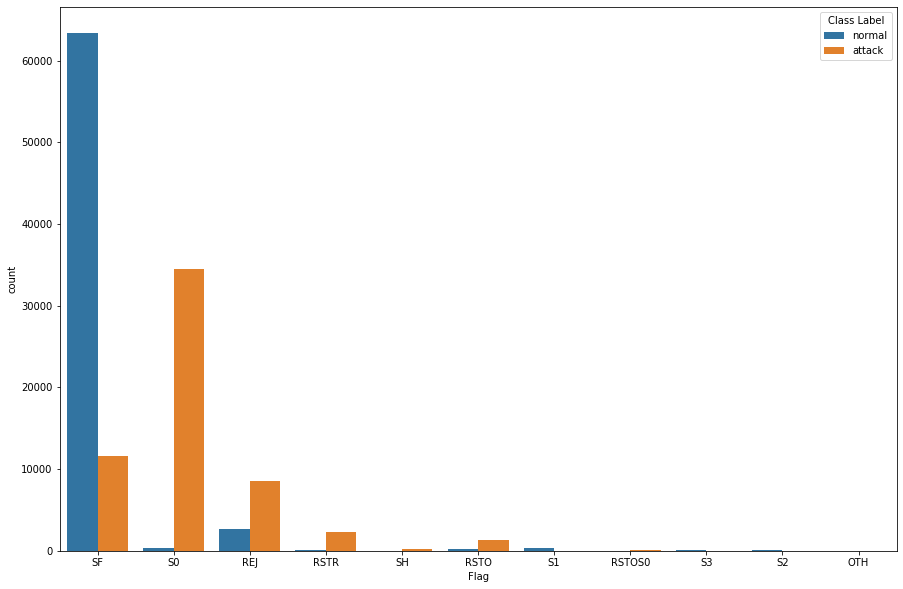

In [ ]:
fig,ax = plt.subplots(figsize=(15,10))
sns.countplot(data=train,x='Flag',hue='Class Label')

SO, REJ and RSTR flags are major flags indicative of attacks

### Login Relationships

In [ ]:
attack_data.pivot_table(index = ['Protocol Type'],
                  aggfunc={'Login':sum, 'Number Failed Logins':sum})

,Login,Number Failed Logins
Protocol Type,,
icmp,0,0
tcp,1995,61
udp,0,0


In [ ]:
train.pivot_table(index = ['Protocol Type','Class Label'],
                  aggfunc={'Login':sum, 'Number Failed Logins':sum})

Login  Number Failed Logins
Protocol Type Class Label                             
icmp          attack           0                     0
              normal           0                     0
tcp           attack        1995                    61
              normal       47857                    93
udp           attack           0                     0
              normal           0                     0

In [ ]:
train['Is host login'].value_counts()

0    125972
1         1
Name: Is host login, dtype: int64

In [ ]:
train['Is guest Login'].value_counts()

0    124786
1      1187
Name: Is guest Login, dtype: int64

In [ ]:
train.pivot_table(index = 'Is host login', columns='Class Label', aggfunc={'Class Label':'count'})

Class Label         
Class Label        attack   normal
Is host login                     
0                 58630.0  67342.0
1                     NaN      1.0

In [ ]:
train.pivot_table(index = 'Is guest Login', columns='Class Label', aggfunc={'Class Label':'count'})

Class Label       
Class Label         attack normal
Is guest Login                   
0                    58316  66470
1                      314    873

### Bytes Informatics

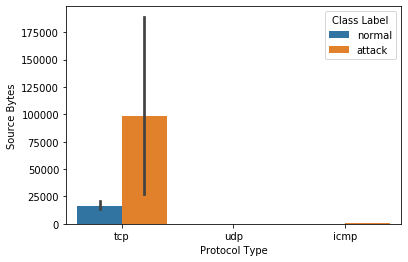

In [ ]:
sns.barplot(y='Source Bytes',x='Protocol Type',hue = 'Class Label',data=train)

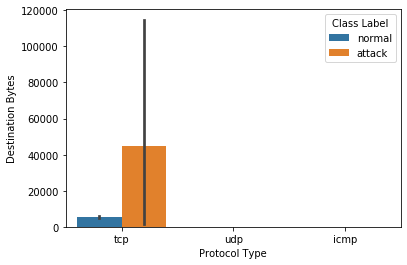

In [ ]:
sns.barplot(y='Destination Bytes',x='Protocol Type',hue = 'Class Label',data=train)

In [ ]:
attack_data['Class Label'][attack_data['Difficulty']>0]

2         attack
5         attack
6         attack
7         attack
8         attack
           ...  
125958    attack
125964    attack
125966    attack
125968    attack
125971    attack
Name: Class Label, Length: 58564, dtype: object

In [ ]:
len(attack_data)

58630

In [ ]:
numerical_features

['Duration',
 'Source Bytes',
 'Destination Bytes',
 'Land',
 'Wrong Fragment',
 'Urgent',
 'Hot',
 'Number Failed Logins',
 'Login',
 'Num compromised',
 'Root Shell',
 'Su attempted',
 'Num root',
 'Num file creations',
 'Num shells',
 'Num access files',
 'Num outbound cmds',
 'Is host login',
 'Is guest Login',
 'Count',
 'Srv Count',
 'Serror rate',
 'Srv Serror rate',
 'Rerror rate',
 'Srv rerror rate',
 'Same srv rate',
 'Diff srv rate',
 'Srv diff host rate',
 'Dst host count',
 'Dst host srv count',
 'Dst host same srv rate',
 'Dst host diff srv rate',
 'Dst host same src port rate',
 'Dst host diff src host rate',
 'Dst host serror rate',
 'Dst host srv serror rate',
 'Dst host rerror rate',
 'Dst host srv rerror rate',
 'Difficulty']

### Data Preprocessing

In [ ]:
class_map = {'normal':0,'attack':1}
train['Class Label'] = train['Class Label'].map(class_map)
test['Class Label'] = test['Class Label'].map(class_map)

In [ ]:
data = pd.concat([train,test],axis=0)

In [ ]:
corr = train.corr()
corr['Class Label'].sort_values(ascending=False)

Class Label                    1.000000
Dst host srv serror rate       0.654985
Dst host serror rate           0.651842
Serror rate                    0.650652
Srv Serror rate                0.648289
Count                          0.576444
Dst host count                 0.375052
Srv rerror rate                0.253504
Dst host srv rerror rate       0.253430
Rerror rate                    0.253397
Dst host rerror rate           0.252563
Dst host diff srv rate         0.242898
Diff srv rate                  0.203660
Wrong Fragment                 0.095905
Dst host same src port rate    0.092444
Dst host diff src host rate    0.062332
Duration                       0.048785
Land                           0.007191
Source Bytes                   0.005921
Destination Bytes              0.004118
Srv Count                      0.000771
Is host login                 -0.002629
Urgent                        -0.002787
Number Failed Logins          -0.003755
Num shells                    -0.009472


In [ ]:
rate_info = ['Dst host srv serror rate','Dst host serror rate','Serror rate','Count','Dst host count'
 ,'Srv rerror rate','Dst host srv rerror rate','Rerror rate','Dst host rerror rate','Dst host diff srv rate',
 'Diff srv rate']

Dst host srv serror rate,Dst host serror rate,Serror rate,Count,Dst host count,Srv rerror rate,Dst host srv rerror rate,Rerror rate,Dst host rerror rate,Dst host diff srv rate,Diff srv rate

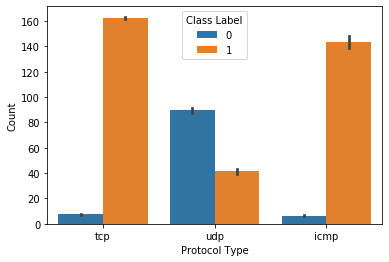

In [ ]:
sns.barplot(y='Count',x='Protocol Type',hue = 'Class Label',data=train)

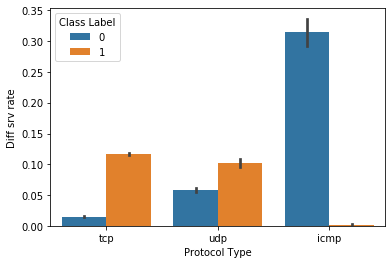

In [ ]:
sns.barplot(y='Diff srv rate',x='Protocol Type',hue = 'Class Label',data=train)

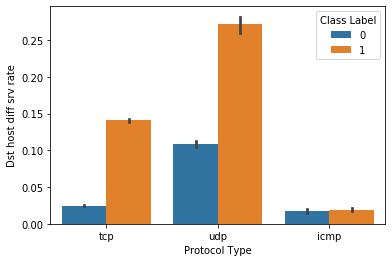

In [ ]:
sns.barplot(y='Dst host diff srv rate',x='Protocol Type',hue = 'Class Label',data=train)

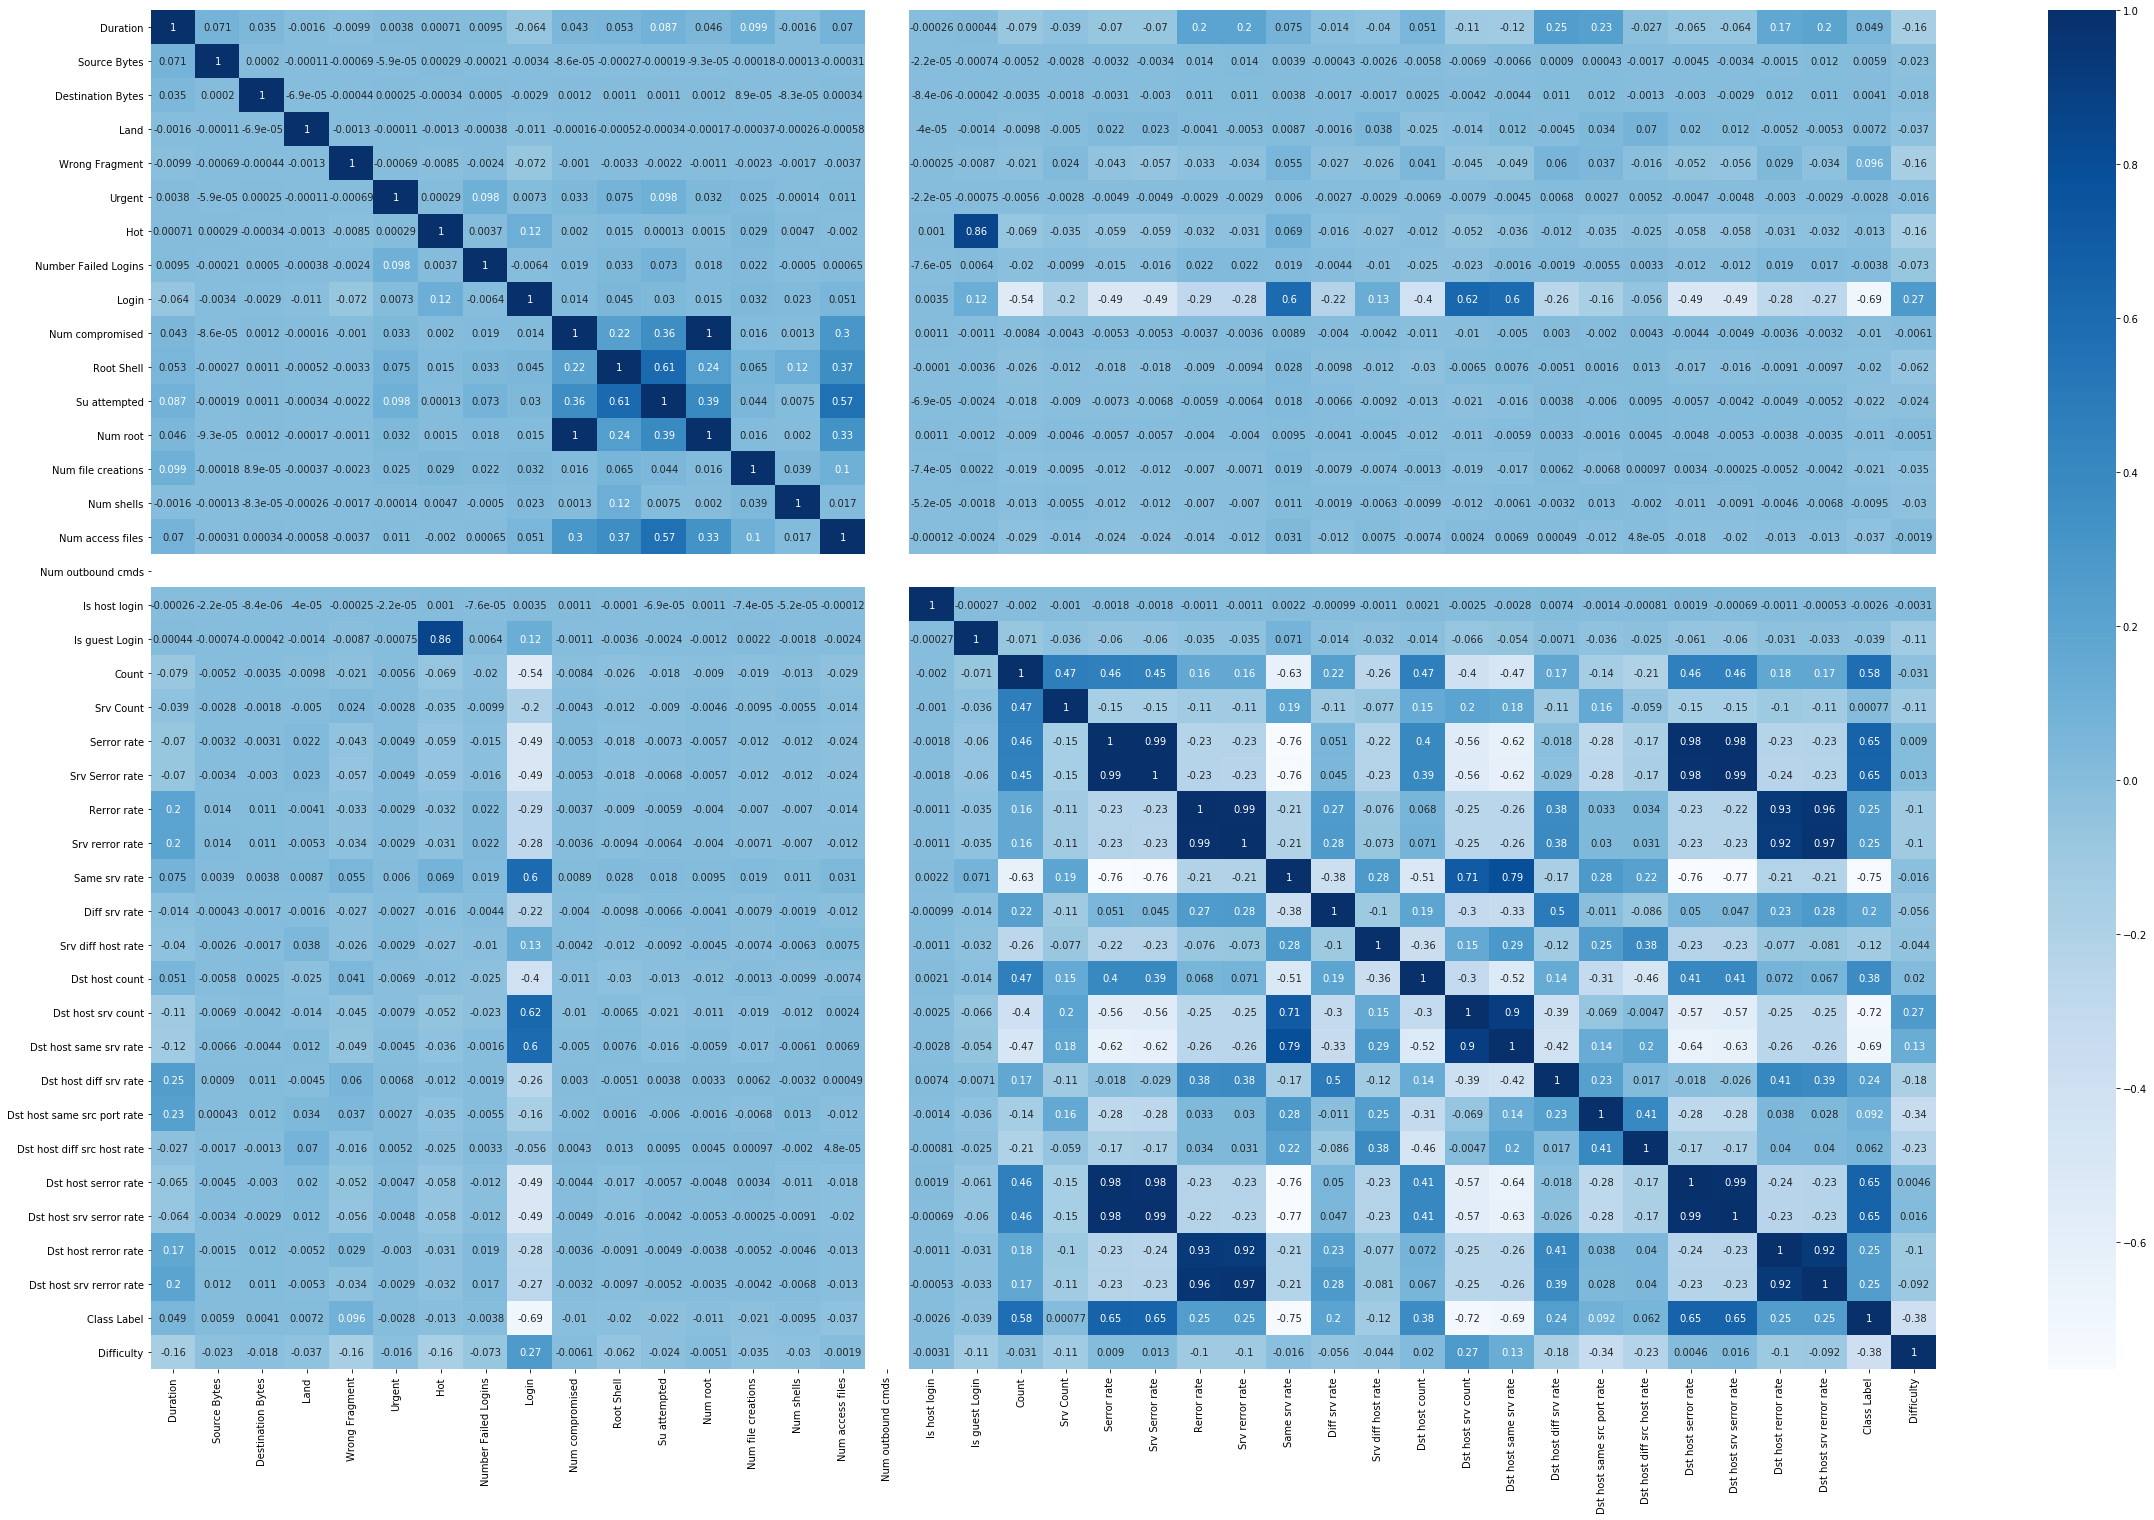

In [ ]:
plt.subplots(figsize=(40,25))
sns.heatmap(train.corr(),annot=True,cmap='Blues')

### Handling Categorical Features

In [ ]:
train.shape

(125973, 43)

In [ ]:
test.shape

(22544, 43)

In [ ]:
for col in categorical_features:
    print(col)
    print(train[col].unique(),'\n')

Protocol Type
['tcp' 'udp' 'icmp'] 

Service
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest'] 

Flag
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH'] 

Class Label
['normal' 'attack'] 



In [ ]:
#'Dos':['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],
 #     'Priviledge Escalations':['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm'],
  #     'Remote Access':['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail',
   #                     'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

In [ ]:
test['Protocol Type'].nunique()

3

In [ ]:
test['Flag'].nunique()

11

## Weight Encoding

In [ ]:
train_service = train['Service'].value_counts()/train['Service'].value_counts().sum()
train_service_map = dict(train_service)

train['Service'] = train['Service'].map(train_service_map)

In [ ]:
test_service = test['Service'].value_counts()/test['Service'].value_counts().sum()
test_service_map = dict(test_service)

test['Service'] = test['Service'].map(test_service_map)

In [ ]:
#protocol encoding
protocol_dummies_train = pd.get_dummies(train['Protocol Type']).add_suffix('_Protocol')
train = pd.concat([train,protocol_dummies_train],axis=1).drop('Protocol Type',axis=1)

protocol_dummies_test = pd.get_dummies(test['Protocol Type']).add_suffix('_Protocol')
test = pd.concat([test,protocol_dummies_test],axis=1).drop('Protocol Type',axis=1)

#flag encoding
flag_dummies_train = pd.get_dummies(train['Flag']).add_suffix('_Flag')
train = pd.concat([train,flag_dummies_train],axis=1).drop('Flag',axis=1)

flag_dummies_test = pd.get_dummies(test['Flag']).add_suffix('_Flag')
test = pd.concat([test,flag_dummies_test],axis=1).drop('Flag',axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Duration                     125973 non-null  int64  
 1   Service                      125973 non-null  float64
 2   Source Bytes                 125973 non-null  int64  
 3   Destination Bytes            125973 non-null  int64  
 4   Land                         125973 non-null  int64  
 5   Wrong Fragment               125973 non-null  int64  
 6   Urgent                       125973 non-null  int64  
 7   Hot                          125973 non-null  int64  
 8   Number Failed Logins         125973 non-null  int64  
 9   Login                        125973 non-null  int64  
 10  Num compromised              125973 non-null  int64  
 11  Root Shell                   125973 non-null  int64  
 12  Su attempted                 125973 non-null  int64  
 13 

In [ ]:
train['Class Label'].isnull().sum()

0

In [ ]:
train['Class Label'].value_counts()

normal    67343
attack    58630
Name: Class Label, dtype: int64

### Mapping Class and Service Features

In [ ]:
train[['Num compromised',
  'Num root',
 'Num file creations',
 'Count',
 'Srv Count']].describe()

,Num compromised,Num root,Num file creations,Count,Srv Count
count,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,0.279250,0.302192,0.012669,84.107555,27.737888
std,23.942042,24.399618,0.483935,114.508607,72.635840
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,0.000000,0.000000,14.000000,8.000000
75%,0.000000,0.000000,0.000000,143.000000,18.000000
max,7479.000000,7468.000000,43.000000,511.000000,511.000000


In [ ]:
data = pd.concat([train,test],axis=0)

In [ ]:
corr

### Categorical Binning

In [ ]:
bins = np.linspace(0,8000,10)
bins

array([   0.        ,  888.88888889, 1777.77777778, 2666.66666667,
       3555.55555556, 4444.44444444, 5333.33333333, 6222.22222222,
       7111.11111111, 8000.        ])

In [ ]:
names = ['<0','0-889','889-1778','1778-2667','2667-3556','3556-4444','4444-5333','5333-6222','>6222']

In [ ]:
train['Num compromised'] = pd.cut(train['Num compromised'],bins,labels=names)
train['Num root'] = pd.cut(train['Num root'],bins,labels=names)

test['Num compromised'] = pd.cut(test['Num compromised'],bins,labels=names)
test['Num root'] = pd.cut(test['Num root'],bins,labels=names)

In [ ]:
compromise_dummies_train = pd.get_dummies(train['Num compromised']).add_prefix('Num Compromise')
train = pd.concat([train,compromise_dummies_train],axis=1).drop('Num compromised',axis=1)

root_dummies_train = pd.get_dummies(train['Num root']).add_prefix('Num Root')
train = pd.concat([train,compromise_dummies_train],axis=1).drop('Num root',axis=1)


compromise_dummies_test = pd.get_dummies(test['Num compromised']).add_prefix('Num Compromise')
test = pd.concat([test,compromise_dummies_test],axis=1).drop('Num compromised',axis=1)

root_dummies_test = pd.get_dummies(test['Num root']).add_prefix('Num Root')
test = pd.concat([test,compromise_dummies_test],axis=1).drop('Num root',axis=1)


### Modelling

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score
import xgboost as xgb
import lightgbm as lgb

In [ ]:
train.shape

(125973, 71)

In [ ]:
test.shape

(22544, 71)

In [ ]:
target = train['Class Label']
data = train.drop(['Class Label','Difficulty'], axis=1)

In [ ]:
test_target = test['Class Label']
test_data = test.drop(['Class Label','Difficulty'], axis=1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data.values, target.values, random_state=16, stratify = target)

In [ ]:
X_train.shape

(94479, 69)

In [ ]:
y_train.shape

(94479,)

In [ ]:
X_test.shape

(31494, 69)

In [ ]:
y_test.shape

(31494,)

## Logistic Regression

In [ ]:
pipe_lr = make_pipeline(MinMaxScaler(),PCA(n_components=60, whiten=True, random_state=0),
                         SelectPercentile(percentile=50),LogisticRegression(C=100,max_iter=1000))

In [ ]:
pipe_lr.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=60,
                     random_state=0, svd_solver='auto', tol=0.0, whiten=True)),
                ('selectpercentile',
                 SelectPercentile(percentile=50,
                                  score_func=<function f_classif at 0x0000020EA98ADDC8>)),
                ('logisticregression',
                 LogisticRegression(C=100, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=F

In [ ]:
pred_test = pipe_lr.predict(X_test)

In [ ]:
confusion = confusion_matrix(y_test, pred_test)
print('Train Result\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(y_test, pred_test,target_names=["normal", "attack"]))

Train Result

Confusion matrix:
[[16230   606]
 [  622 14036]]

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     16836
           1       0.96      0.96      0.96     14658

    accuracy                           0.96     31494
   macro avg       0.96      0.96      0.96     31494
weighted avg       0.96      0.96      0.96     31494



In [ ]:
prediction = pipe_lr.predict(test_data)

In [ ]:
accuracy_score(test_target,prediction)

0.7660131298793471

In [ ]:
confusion = confusion_matrix(test_target,prediction)
print('Test Result\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(test_target,prediction,target_names=["normal", "attack"]))

Test Result

Confusion matrix:
[[9046  665]
 [4610 8223]]

              precision    recall  f1-score   support

      normal       0.66      0.93      0.77      9711
      attack       0.93      0.64      0.76     12833

    accuracy                           0.77     22544
   macro avg       0.79      0.79      0.77     22544
weighted avg       0.81      0.77      0.76     22544



## RANDOM FOREST

In [ ]:
pipe_rf = make_pipeline(PCA(n_components=0.7, whiten=True, random_state=16),
                        SelectPercentile(percentile=25),RandomForestClassifier(n_estimators=150,max_depth=5,random_state=16))

In [ ]:
pipe_rf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.7,
                     random_state=16, svd_solver='auto', tol=0.0,
                     whiten=True)),
                ('selectpercentile',
                 SelectPercentile(percentile=25,
                                  score_func=<function f_classif at 0x000002CE06E5EEE8>)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=5, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_w

In [ ]:
pred_test = pipe_rf.predict(X_test)

In [ ]:
confusion = confusion_matrix(pred_test,y_test)
print('Train Result\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(y_test, pred_test,target_names=["normal", "attack"]))

Train Result

Confusion matrix:
[[15914   395]
 [  922 14263]]

              precision    recall  f1-score   support

      normal       0.98      0.95      0.96     16836
      attack       0.94      0.97      0.96     14658

    accuracy                           0.96     31494
   macro avg       0.96      0.96      0.96     31494
weighted avg       0.96      0.96      0.96     31494



In [ ]:
rf_prediction = pipe_rf.predict(test_data)

In [ ]:
accuracy_score(test_target,rf_prediction)

0.8080642299503193

In [ ]:
confusion = confusion_matrix(test_target,prediction)
print('Test Result\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(test_target,prediction,target_names=["normal", "attack"]))

Test Result

Confusion matrix:
[[ 8491  1220]
 [10653  2180]]

              precision    recall  f1-score   support

      normal       0.44      0.87      0.59      9711
      attack       0.64      0.17      0.27     12833

    accuracy                           0.47     22544
   macro avg       0.54      0.52      0.43     22544
weighted avg       0.56      0.47      0.41     22544



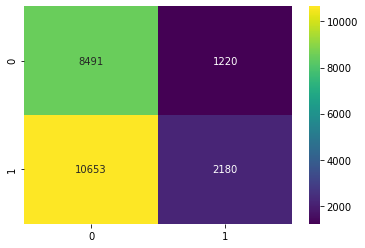

In [ ]:
sns.heatmap(confusion,fmt='d',annot=True,cmap='viridis')

## Gradient Boosting

In [ ]:
pipe_gb = make_pipeline(PCA(n_components=0.7, whiten=True, random_state=0),
                        SelectPercentile(percentile=25),
                        GradientBoostingClassifier(n_estimators = 150, max_features='log2',max_depth = 7,learning_rate=0.2,random_state=16))

In [ ]:
pipe_gb.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.7,
                     random_state=0, svd_solver='auto', tol=0.0, whiten=True)),
                ('selectpercentile',
                 SelectPercentile(percentile=25,
                                  score_func=<function f_classif at 0x000002CE06E5EEE8>)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.2, loss='deviance',
                                            max_depth=7, max_features='log2',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
          

In [ ]:
pred_test = pipe_gb.predict(X_test)

In [ ]:
confusion = confusion_matrix(pred_test,y_test)
print('Train\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(y_test, pred_test,target_names=["normal", "attack"]))

Train

Confusion matrix:
[[15875   257]
 [  961 14401]]

              precision    recall  f1-score   support

      normal       0.98      0.94      0.96     16836
      attack       0.94      0.98      0.96     14658

    accuracy                           0.96     31494
   macro avg       0.96      0.96      0.96     31494
weighted avg       0.96      0.96      0.96     31494



In [ ]:
gb_prediction = pipe_gb.predict(test_data)

In [ ]:
accuracy_score(test_target,gb_prediction)

0.8156937544357701

In [ ]:
confusion = confusion_matrix(test_target,prediction)
print('Test Result\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(test_target,prediction,target_names=["normal", "attack"]))

Test Result

Confusion matrix:
[[ 8491  1220]
 [10653  2180]]

              precision    recall  f1-score   support

      normal       0.44      0.87      0.59      9711
      attack       0.64      0.17      0.27     12833

    accuracy                           0.47     22544
   macro avg       0.54      0.52      0.43     22544
weighted avg       0.56      0.47      0.41     22544



## XGBOOST

In [ ]:
pipe_xgb = make_pipeline(PCA(n_components=0.7, whiten=True, random_state=0),
                        SelectPercentile(percentile=25),xgb.XGBClassifier(n_estimators=150,learning_rate=0.1,max_depth=5,random_state=16))

In [ ]:
pipe_xgb.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.7,
                     random_state=0, svd_solver='auto', tol=0.0, whiten=True)),
                ('selectpercentile',
                 SelectPercentile(percentile=25,
                                  score_func=<function f_classif at 0x000002CE06E5EEE8>)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsa...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=5, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
         

In [ ]:
pred_test = pipe_xgb.predict(X_test)

In [ ]:
confusion = confusion_matrix(pred_test,y_test)
print('Train Result\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(y_test, pred_test,target_names=["normal", "attack"]))

Train Result

Confusion matrix:
[[15963   115]
 [  873 14543]]

              precision    recall  f1-score   support

      normal       0.99      0.95      0.97     16836
      attack       0.94      0.99      0.97     14658

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



In [ ]:
xgb_prediction = pipe_xgb.predict(test_data)

In [ ]:
accuracy_score(test_target,xgb_prediction)

0.8092618878637331

In [ ]:
confusion = confusion_matrix(test_target,prediction)
print('Test Result\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(test_target,prediction,target_names=["normal", "attack"]))

Test Result

Confusion matrix:
[[ 8491  1220]
 [10653  2180]]

              precision    recall  f1-score   support

      normal       0.44      0.87      0.59      9711
      attack       0.64      0.17      0.27     12833

    accuracy                           0.47     22544
   macro avg       0.54      0.52      0.43     22544
weighted avg       0.56      0.47      0.41     22544



## LIGHTGBM

In [ ]:
pipe_lgb = make_pipeline(PCA(n_components=0.7, whiten=True, random_state=0),
                        SelectPercentile(percentile=25),
                         lgb.LGBMClassifier(num_iterations=150,
                                            max_depth=5,learning_rate=0.1,random_state=16))


In [ ]:
pipe_lgb.fit(X_train,y_train)

C:\Users\ben\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.7,
                     random_state=0, svd_solver='auto', tol=0.0, whiten=True)),
                ('selectpercentile',
                 SelectPercentile(percentile=25,
                                  score_func=<function f_classif at 0x000002CE06E5EEE8>)),
                ('lgbmclassifier',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=5,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_iterations=150, num_leaves=31,
                                objective=None, random_state=16, reg_alpha=0.0,
                                reg_lambda=0.0, silent='warn', subs

In [ ]:
pred_test = pipe_lgb.predict(X_test)

In [ ]:
confusion = confusion_matrix(pred_test,y_test)
print('Train Result\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(y_test, pred_test,target_names=["normal", "attack"]))

Train Result

Confusion matrix:
[[15686   531]
 [ 1150 14127]]

              precision    recall  f1-score   support

      normal       0.97      0.93      0.95     16836
      attack       0.92      0.96      0.94     14658

    accuracy                           0.95     31494
   macro avg       0.95      0.95      0.95     31494
weighted avg       0.95      0.95      0.95     31494



In [ ]:
lgb_prediction = pipe_lgb.predict(test_data)

In [ ]:
accuracy_score(test_target,lgb_prediction)

0.8548172462739532

In [ ]:
confusion = confusion_matrix(test_target,prediction)
print('Test Result\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(test_target,prediction,target_names=["normal", "attack"]))

Test Result

Confusion matrix:
[[ 8491  1220]
 [10653  2180]]

              precision    recall  f1-score   support

      normal       0.44      0.87      0.59      9711
      attack       0.64      0.17      0.27     12833

    accuracy                           0.47     22544
   macro avg       0.54      0.52      0.43     22544
weighted avg       0.56      0.47      0.41     22544



## SVM

In [ ]:
pipe_svm = make_pipeline(MinMaxScaler(),PCA(n_components=0.7, whiten=True, random_state=0),
                    SelectPercentile(percentile=50),SVC(C = 1000, gamma = 0.5, max_iter=1000,
                                                        random_state=16,probability=True))

In [ ]:
pipe_svm.fit(X_train,y_train)

C:\Users\ben\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.7,
                     random_state=0, svd_solver='auto', tol=0.0, whiten=True)),
                ('selectpercentile',
                 SelectPercentile(percentile=50,
                                  score_func=<function f_classif at 0x000002CE06E5EEE8>)),
                ('svc',
                 SVC(C=1000, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.5,
                     kernel='rbf', max_iter=1000, probability=True,
                     random_state=16, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
pred_test = pipe_svm.predict(X_test)

In [ ]:
confusion = confusion_matrix(pred_test,y_test)
print('Train Result\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(y_test, pred_test,target_names=["normal", "attack"]))

Train Result

Confusion matrix:
[[  855     0]
 [15981 14658]]

              precision    recall  f1-score   support

      normal       1.00      0.05      0.10     16836
      attack       0.48      1.00      0.65     14658

    accuracy                           0.49     31494
   macro avg       0.74      0.53      0.37     31494
weighted avg       0.76      0.49      0.35     31494



In [ ]:
svm_prediction = pipe_svm.predict(test_data)

In [ ]:
accuracy_score(test_target,prediction)

0.4733410220014194

In [ ]:
confusion = confusion_matrix(test_target,prediction)
print('Test Result\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(test_target,prediction,target_names=["normal", "attack"]))

Test Result

Confusion matrix:
[[ 8491  1220]
 [10653  2180]]

              precision    recall  f1-score   support

      normal       0.44      0.87      0.59      9711
      attack       0.64      0.17      0.27     12833

    accuracy                           0.47     22544
   macro avg       0.54      0.52      0.43     22544
weighted avg       0.56      0.47      0.41     22544



## Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting_clf = VotingClassifier(estimators=[('xgb',pipe_xgb),('rf',pipe_rf),('gb',pipe_gb),('lgb',pipe_lgb)],
                             voting = 'hard')

In [ ]:
voting_clf.fit(X_train,y_train)

C:\Users\ben\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


VotingClassifier(estimators=[('xgb',
                              Pipeline(memory=None,
                                       steps=[('pca',
                                               PCA(copy=True,
                                                   iterated_power='auto',
                                                   n_components=0.7,
                                                   random_state=0,
                                                   svd_solver='auto', tol=0.0,
                                                   whiten=True)),
                                              ('selectpercentile',
                                               SelectPercentile(percentile=25,
                                                                score_func=<function f_classif at 0x000002CE06E5EEE8>)),
                                              ('xgbclassifier',
                                               XGBClassifier(base_score=0.5,
                                

In [ ]:
predict = voting_clf.predict(test_data)

In [ ]:
accuracy_score(test_target,predict)

0.8127661462029808

In [ ]:
print(classification_report(test_target,predict))

              precision    recall  f1-score   support

           0       0.71      0.96      0.82      9711
           1       0.96      0.70      0.81     12833

    accuracy                           0.81     22544
   macro avg       0.83      0.83      0.81     22544
weighted avg       0.85      0.81      0.81     22544



## Cross Validation

In [ ]:
kfold = StratifiedKFold(n_splits =5, shuffle=True, random_state=16)

In [ ]:
def validate(model):
    scores = cross_val_score(model, data, target, cv=kfold)
    print(scores)
    print(scores.mean())

## Hyperparameter Tuning

### All models optimization

In [ ]:
kfold = StratifiedKFold(n_splits = 5, shuffle =True, random_state=16)

### Lightgbm

In [ ]:
param_lgb = {'decomposer__n_components':[0.7,0.8,0.9],
             'selector__percentile':[25,50,75], 'classifier__n_iteration':[150,200,250],
             'classifier__learning_rate':[0.1,0.3,0.5]}

In [ ]:
pipe_lgb = Pipeline([('decomposer', PCA(random_state=16)),('selector',SelectPercentile()),
                     ('classifier',lgb.LGBMClassifier(random_state=16))])

In [ ]:
grid_lgb = GridSearchCV(pipe_lgb, param_grid = param_lgb, cv =kfold, scoring = 'accuracy')

In [ ]:
grid_lgb.fit(X_train,y_train)

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)


[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration
[LightGBM] [Warning] Unknown parameter: n_iteration


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=16, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('decomposer',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None, random_state=16,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('selector',
                                        SelectPercentile(percentile=10,
                                                         score_func=<function f_classif at 0x0000020EA98ADDC8>)),
                                       ('...
                                                       subsample=1.0,
                                                       subsample_for_bin=200000,
                                                       subsample_freq=0

In [ ]:
results = pd.DataFrame(grid_lgb.cv_results_)

In [ ]:
results

In [ ]:
print("Best cross-validation accuracy: {:.2f}".format(grid_lgb.best_score_))
print("Test set score: {:.2f}".format(grid_lgb.score(X_test, y_test)))
print("Best parameters: {}".format(grid_lgb.best_params_))

Best cross-validation accuracy: nan
Test set score: 0.95
Best parameters: {'classifier__learning_rate': 0.1, 'classifier__n_iteration': 150, 'decomposer__n_components': 0.7, 'selector__percentile': 25}


In [ ]:
prediction = grid_lgb.predict(test_data)

In [ ]:
accuracy_score(test_target,prediction)

0.8548172462739532

### Xgboost

In [ ]:
param_xgb = {'decomposer__n_components':[0.7,0.8,0.9],
             'selector__percentile':[25,50,75], 'classifier__n_estimators':[150,200,250],
             'classifier__learning_rate':[0.1,0.3,0.5], 'classifier__max_depth':[5,7,11]}

In [ ]:
pipe_xgb = Pipeline([('decomposer', PCA(random_state=16)),('selector',SelectPercentile()),
                     ('classifier',xgb.XGBClassifier(random_state=16))])

In [ ]:
grid_xgb = GridSearchCV(pipe_xgb, param_grid = param_xgb, cv =kfold, scoring = 'accuracy')

In [ ]:
grid_xgb.fit(X_train,y_train)

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [23:46:52] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [23:50:33] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [23:54:56] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [00:00:33] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [00:05:01] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [00:11:25] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [00:17:56] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [05:53:18] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [06:02:15] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [06:08:22] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [06:12:24] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [06:17:35] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [06:22:03] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [06:27:44] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [06:33:55] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [06:40:19] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [06:48:01] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [06:56:39] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [07:00:13] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [07:05:22] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [09:42:29] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [16:07:58] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [16:14:32] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [16:20:56] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [16:28:52] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:652: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=16, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('decomposer',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None, random_state=16,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('selector',
                                        SelectPercentile(percentile=10,
                                                         score_func=<function f_classif at 0x0000020EA98ADDC8>)),
                                       ('...
                                                      reg_alpha=None, ...))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'classifier__learning_rate'

In [ ]:
results = pd.DataFrame(grid_xgb.cv_results_)

In [ ]:
print("Best cross-validation accuracy: {:.2f}".format(grid_xgb.best_score_))
print("Test set score: {:.2f}".format(grid_xgb.score(X_test, y_test)))
print("Best parameters: {}".format(grid_xgb.best_params_))

Best cross-validation accuracy: nan
Test set score: 0.97
Best parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 150, 'decomposer__n_components': 0.7, 'selector__percentile': 25}


### Gradient Boosting

In [ ]:
param_gb = {'decomposer__n_components':[50,70],
             'selector__percentile':[25,50,75], 'classifier__n_estimators':[150,200,250],
             'classifier__learning_rate':[0.1,0.3,0.5], 'classifier__max_depth':[5,7,11]}

In [ ]:
pipe_gb = Pipeline([('decomposer', PCA(random_state=16)),('selector',SelectPercentile(percentile=50)),
                     ('classifier',GradientBoostingClassifier(random_state=16))])

In [ ]:
grid_gb = GridSearchCV(pipe_gb, param_grid = param_gb, cv =kfold, scoring = 'accuracy')

In [ ]:
grid_gb.fit(X_train,y_train)

In [ ]:
results = pd.DataFrame(grid_gb.cv_results_)

In [ ]:
print("Best cross-validation accuracy: {:.2f}".format(grid_gb.best_score_))
print("Test set score: {:.2f}".format(grid_gb.score(X_test, y_test)))
print("Best parameters: {}".format(grid_gb.best_params_))

### Random Forest

In [ ]:
param_rf = {'decomposer__n_components':[0.7,0.8,0.9],
             'selector__percentile':[25,50,75], 'classifier__n_estimators':[150,200,250],
            'classifier__max_depth':[5,7,11]}

In [ ]:
pipe_rf = Pipeline([('decomposer', PCA(random_state=16)),('selector',SelectPercentile()),
                     ('classifier',RandomForestClassifier(random_state=16))])

In [ ]:
grid_rf = GridSearchCV(pipe_rf, param_grid = param_rf, cv =kfold, scoring = 'accuracy')

In [ ]:
grid_rf.fit(X_train,y_train)

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75583, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(75584, 0

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=16, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('decomposer',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None, random_state=16,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('selector',
                                        SelectPercentile(percentile=10,
                                                         score_func=<function f_classif at 0x0000020EA98ADDC8>)),
                                       ('...
                                                               oob_score=False,
                                                               random_state=16,
                                                              

In [ ]:
results = pd.DataFrame(grid_rf.cv_results_)

In [ ]:
print("Best cross-validation accuracy: {:.2f}".format(grid_rf.best_score_))
print("Test set score: {:.2f}".format(grid_rf.score(X_test, y_test)))
print("Best parameters: {}".format(grid_rf.best_params_))

Best cross-validation accuracy: nan
Test set score: 0.96
Best parameters: {'classifier__max_depth': 5, 'classifier__n_estimators': 150, 'decomposer__n_components': 0.7, 'selector__percentile': 25}


### SVM

In [ ]:
param_svm = {'decomposer__n_components':[50,70],
             'selector__percentile':[25,50], 'classifier__C':[100,1000,10000],
            'classifier__gamma':[0.01,0.1,10]}

In [ ]:
pipe_svm = Pipeline([('scaler',MinMaxScaler()),('decomposer', PCA(random_state=16)),('selector',SelectPercentile()),
                     ('classifier',SVC(random_state=16))])

In [ ]:
grid_svm = GridSearchCV(pipe_svm, param_grid = param_svm, cv =kfold, scoring = 'accuracy')

In [ ]:
grid_svm.fit(X_train,y_train)

C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  F

C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  F

C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  F

C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  F

C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  F

C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  F

C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  F

C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  FitFailedWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=70 must be between 0 and min(n_samples, n_features)=69 with svd_solver='full'

  F

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=16, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('decomposer',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None, random_state=16,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('selector',
                                        SelectPercentile(percentile=10,...
             iid='deprecated', n_jobs=None,
             param_grid={'classifier__C': [100, 1000, 10000],
                         'classifier__gamma': [0.01, 0.1, 0.5],
                 

In [ ]:
print("Best cross-validation accuracy: {:.2f}".format(grid_svm.best_score_))
print("Test set score: {:.2f}".format(grid_svm.score(X_test, y_test)))
print("Best parameters: {}".format(grid_svm.best_params_))

Best cross-validation accuracy: 1.00
Test set score: 1.00
Best parameters: {'classifier__C': 1000, 'classifier__gamma': 0.5, 'decomposer__n_components': 50, 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1)), 'selector__percentile': 50}
